In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [4]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [5]:
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))


Epoch [5/60], Loss: 4.9299
Epoch [10/60], Loss: 2.1247
Epoch [15/60], Loss: 0.9882
Epoch [20/60], Loss: 0.5277
Epoch [25/60], Loss: 0.3411
Epoch [30/60], Loss: 0.2655
Epoch [35/60], Loss: 0.2347
Epoch [40/60], Loss: 0.2222
Epoch [45/60], Loss: 0.2171
Epoch [50/60], Loss: 0.2149
Epoch [55/60], Loss: 0.2140
Epoch [60/60], Loss: 0.2135


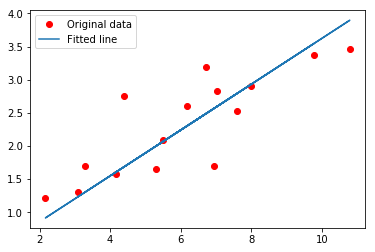

In [6]:
%matplotlib inline
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [ ]:
torch.save(model.state_dict(), 'model.pkl')

In [7]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [8]:
# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [9]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)


Processing
Done!


In [10]:
test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())


In [11]:
# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [12]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out



In [13]:
model = LogisticRegression(input_size, num_classes)

In [14]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [15]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch: [1/5], Step: [100/600], Loss: 2.1971
Epoch: [1/5], Step: [200/600], Loss: 2.0845
Epoch: [1/5], Step: [300/600], Loss: 2.0577
Epoch: [1/5], Step: [400/600], Loss: 1.9803
Epoch: [1/5], Step: [500/600], Loss: 1.8951
Epoch: [1/5], Step: [600/600], Loss: 1.7557
Epoch: [2/5], Step: [100/600], Loss: 1.7800
Epoch: [2/5], Step: [200/600], Loss: 1.6423
Epoch: [2/5], Step: [300/600], Loss: 1.6390
Epoch: [2/5], Step: [400/600], Loss: 1.5582
Epoch: [2/5], Step: [500/600], Loss: 1.5641
Epoch: [2/5], Step: [600/600], Loss: 1.4426
Epoch: [3/5], Step: [100/600], Loss: 1.4284
Epoch: [3/5], Step: [200/600], Loss: 1.3471
Epoch: [3/5], Step: [300/600], Loss: 1.3260
Epoch: [3/5], Step: [400/600], Loss: 1.3668
Epoch: [3/5], Step: [500/600], Loss: 1.2721
Epoch: [3/5], Step: [600/600], Loss: 1.3012
Epoch: [4/5], Step: [100/600], Loss: 1.1877
Epoch: [4/5], Step: [200/600], Loss: 1.0875
Epoch: [4/5], Step: [300/600], Loss: 1.2097
Epoch: [4/5], Step: [400/600], Loss: 1.1151
Epoch: [4/5], Step: [500/600], L

In [16]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the model on the 10000 test images: 82 %


In [17]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [18]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [19]:
# MNIST Dataset 
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())


Files already downloaded


In [20]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [21]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [22]:
net = Net(input_size, hidden_size, num_classes)

In [23]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

In [24]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch [1/5], Step [100/600], Loss: 0.2983
Epoch [1/5], Step [200/600], Loss: 0.4855
Epoch [1/5], Step [300/600], Loss: 0.2400
Epoch [1/5], Step [400/600], Loss: 0.1754
Epoch [1/5], Step [500/600], Loss: 0.1798
Epoch [1/5], Step [600/600], Loss: 0.2138
Epoch [2/5], Step [100/600], Loss: 0.0722
Epoch [2/5], Step [200/600], Loss: 0.1377
Epoch [2/5], Step [300/600], Loss: 0.0720
Epoch [2/5], Step [400/600], Loss: 0.1191
Epoch [2/5], Step [500/600], Loss: 0.0996
Epoch [2/5], Step [600/600], Loss: 0.0550
Epoch [3/5], Step [100/600], Loss: 0.0485
Epoch [3/5], Step [200/600], Loss: 0.1127
Epoch [3/5], Step [300/600], Loss: 0.0264
Epoch [3/5], Step [400/600], Loss: 0.0451
Epoch [3/5], Step [500/600], Loss: 0.0449
Epoch [3/5], Step [600/600], Loss: 0.0612
Epoch [4/5], Step [100/600], Loss: 0.0927
Epoch [4/5], Step [200/600], Loss: 0.0198
Epoch [4/5], Step [300/600], Loss: 0.0267
Epoch [4/5], Step [400/600], Loss: 0.0781
Epoch [4/5], Step [500/600], Loss: 0.1144
Epoch [4/5], Step [600/600], Loss:

In [25]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %


In [26]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [27]:
# Hyper Parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [28]:
# MNIST Dataset
train_dataset = dsets.MNIST(root='../data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../data/',
                           train=False, 
                           transform=transforms.ToTensor())


Files already downloaded


In [29]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


In [30]:
# CNN Model (2 conv layer)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [31]:
cnn = CNN()


In [32]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)


In [33]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch [1/5], Iter [100/600] Loss: 0.2739
Epoch [1/5], Iter [200/600] Loss: 0.1497
Epoch [1/5], Iter [300/600] Loss: 0.0468
Epoch [1/5], Iter [400/600] Loss: 0.0679
Epoch [1/5], Iter [500/600] Loss: 0.0619
Epoch [1/5], Iter [600/600] Loss: 0.0707
Epoch [2/5], Iter [100/600] Loss: 0.0603
Epoch [2/5], Iter [200/600] Loss: 0.0632
Epoch [2/5], Iter [300/600] Loss: 0.0086
Epoch [2/5], Iter [400/600] Loss: 0.0283
Epoch [2/5], Iter [500/600] Loss: 0.1828
Epoch [2/5], Iter [600/600] Loss: 0.0286
Epoch [3/5], Iter [100/600] Loss: 0.0642
Epoch [3/5], Iter [200/600] Loss: 0.0358
Epoch [3/5], Iter [300/600] Loss: 0.0321
Epoch [3/5], Iter [400/600] Loss: 0.0054
Epoch [3/5], Iter [500/600] Loss: 0.0393
Epoch [3/5], Iter [600/600] Loss: 0.0314
Epoch [4/5], Iter [100/600] Loss: 0.0313
Epoch [4/5], Iter [200/600] Loss: 0.0452
Epoch [4/5], Iter [300/600] Loss: 0.0291
Epoch [4/5], Iter [400/600] Loss: 0.0153
Epoch [4/5], Iter [500/600] Loss: 0.0572
Epoch [4/5], Iter [600/600] Loss: 0.0362
Epoch [5/5], Ite

In [34]:
# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99 %


In [36]:
# Implementation of https://arxiv.org/pdf/1512.03385.pdf.
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [37]:
# Image Preprocessing 
transform = transforms.Compose([
    transforms.Scale(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])


In [38]:
# CIFAR-10 Dataset
train_dataset = dsets.CIFAR10(root='../data/',
                               train=True, 
                               transform=transform,
                               download=True)

test_dataset = dsets.CIFAR10(root='../data/',
                              train=False, 
                              transform=transforms.ToTensor())



Extracting tar file
Done!


In [39]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100, 
                                          shuffle=False)


In [40]:
# 3x3 Convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)


In [41]:
# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out


In [42]:
# ResNet Module
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[0], 2)
        self.layer3 = self.make_layer(block, 64, layers[1], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [43]:
resnet = ResNet(ResidualBlock, [2, 2, 2, 2])

In [44]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(resnet.parameters(), lr=lr)

In [47]:
# Training 
for epoch in range(25):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [%d/%d], Iter [%d/%d] Loss: %.4f" %(epoch+1, 25, i+1, 500, loss.data[0]))

    # Decaying Learning Rate
    if (epoch+1) % 5 == 0:
        lr /= 3
        optimizer = torch.optim.Adam(resnet.parameters(), lr=lr) 


Epoch [1/25], Iter [100/500] Loss: 0.7085
Epoch [1/25], Iter [200/500] Loss: 0.4810
Epoch [1/25], Iter [300/500] Loss: 0.6156
Epoch [1/25], Iter [400/500] Loss: 0.5820
Epoch [1/25], Iter [500/500] Loss: 0.7056
Epoch [2/25], Iter [100/500] Loss: 0.6976
Epoch [2/25], Iter [200/500] Loss: 0.7040
Epoch [2/25], Iter [300/500] Loss: 0.6183
Epoch [2/25], Iter [400/500] Loss: 0.6477
Epoch [2/25], Iter [500/500] Loss: 0.6478
Epoch [3/25], Iter [100/500] Loss: 0.4870
Epoch [3/25], Iter [200/500] Loss: 0.6026
Epoch [3/25], Iter [300/500] Loss: 0.7608
Epoch [3/25], Iter [400/500] Loss: 0.6777
Epoch [3/25], Iter [500/500] Loss: 0.6317
Epoch [4/25], Iter [100/500] Loss: 0.7225
Epoch [4/25], Iter [200/500] Loss: 0.9548
Epoch [4/25], Iter [300/500] Loss: 0.4294
Epoch [4/25], Iter [400/500] Loss: 0.5718
Epoch [4/25], Iter [500/500] Loss: 0.5480
Epoch [5/25], Iter [100/500] Loss: 0.6798
Epoch [5/25], Iter [200/500] Loss: 0.5859
Epoch [5/25], Iter [300/500] Loss: 0.6270
Epoch [5/25], Iter [400/500] Loss:

In [48]:
# Test
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = resnet(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the test images: %d %%' % (100 * correct / total))


Accuracy of the model on the test images: 83 %


In [49]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [50]:
# Hyper Parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01


In [52]:
# MNIST Dataset
train_dataset = dsets.MNIST(root='../data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../data/',
                           train=False, 
                           transform=transforms.ToTensor())


Files already downloaded


In [53]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


In [54]:
# RNN Model (Many-to-One)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial states 
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        # Forward propagate RNN
        out, _ = self.lstm(x, (h0, c0))  
        
        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])  
        return out


In [55]:
rnn = RNN(input_size, hidden_size, num_layers, num_classes)


In [56]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)


In [57]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, sequence_length, input_size))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = rnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch [1/2], Step [100/600], Loss: 0.5438
Epoch [1/2], Step [200/600], Loss: 0.3616
Epoch [1/2], Step [300/600], Loss: 0.1673
Epoch [1/2], Step [400/600], Loss: 0.3234
Epoch [1/2], Step [500/600], Loss: 0.0999
Epoch [1/2], Step [600/600], Loss: 0.1208
Epoch [2/2], Step [100/600], Loss: 0.1724
Epoch [2/2], Step [200/600], Loss: 0.2256
Epoch [2/2], Step [300/600], Loss: 0.1278
Epoch [2/2], Step [400/600], Loss: 0.1103
Epoch [2/2], Step [500/600], Loss: 0.1295
Epoch [2/2], Step [600/600], Loss: 0.1743


In [59]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, sequence_length, input_size))
    outputs = rnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 


Test Accuracy of the model on the 10000 test images: 97 %


In [3]:
import torch 
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import os


In [7]:
class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0
    
    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1
    
    def __len__(self):
        return len(self.word2idx)
    
class Corpus(object):
    def __init__(self, path='./data'):
        self.dictionary = Dictionary()
        self.train = os.path.join(path, 'train.txt')
        self.test = os.path.join(path, 'test.txt')

    def get_data(self, path, batch_size=20):
        # Add words to the dictionary
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words: 
                    self.dictionary.add_word(word)  
        
        # Tokenize the file content
        ids = torch.LongTensor(tokens)
        token = 0
        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches*batch_size]
        return ids.view(batch_size, -1)
    
# RNN Based Language Model
class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNLM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.init_weights()
        
    def init_weights(self):
        self.embed.weight.data.uniform_(-0.1, 0.1)
        self.linear.bias.data.fill_(0)
        self.linear.weight.data.uniform_(-0.1, 0.1)
        
    def forward(self, x, h):
        # Embed word ids to vectors
        x = self.embed(x) 
        
        # Forward propagate RNN  
        out, h = self.lstm(x, h)
        
        # Reshape output to (batch_size*sequence_length, hidden_size)
        out = out.contiguous().view(out.size(0)*out.size(1), out.size(2))
        
        # Decode hidden states of all time step
        out = self.linear(out)  
        return out, h


In [5]:
# Hyper Parameters
embed_size = 128
hidden_size = 1024
num_layers = 1
num_epochs = 5
num_samples = 1000   # number of words to be sampled
batch_size = 20
seq_length = 30
learning_rate = 0.002

In [6]:
# Load Penn Treebank Dataset
train_path = './data/train.txt'
sample_path = './sample.txt'
corpus = Corpus()
ids = corpus.get_data(train_path, batch_size)
vocab_size = len(corpus.dictionary)
num_batches = ids.size(1) // seq_length


In [8]:
model = RNNLM(vocab_size, embed_size, hidden_size, num_layers)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Truncated Backpropagation 
def detach(states):
    return [Variable(state.data) for state in states] 


In [10]:
# Training
for epoch in range(num_epochs):
    # Initial hidden and memory states
    states = (Variable(torch.zeros(num_layers, batch_size, hidden_size)),
              Variable(torch.zeros(num_layers, batch_size, hidden_size)))
    
    for i in range(0, ids.size(1) - seq_length, seq_length):
        # Get batch inputs and targets
        inputs = Variable(ids[:, i:i+seq_length])
        targets = Variable(ids[:, (i+1):(i+1)+seq_length].contiguous())
        
        # Forward + Backward + Optimize
        model.zero_grad()
        states = detach(states)
        outputs, states = model(inputs, states) 
        loss = criterion(outputs, targets.view(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm(model.parameters(), 0.5)
        optimizer.step()

        step = (i+1) // seq_length
        if step % 100 == 0:
            print ('Epoch [%d/%d], Step[%d/%d], Loss: %.3f, Perplexity: %5.2f' %
                   (epoch+1, num_epochs, step, num_batches, loss.data[0], np.exp(loss.data[0])))


Epoch [1/5], Step[0/1549], Loss: 9.212, Perplexity: 10012.28
Epoch [1/5], Step[100/1549], Loss: 6.026, Perplexity: 414.23
Epoch [1/5], Step[200/1549], Loss: 5.932, Perplexity: 376.74
Epoch [1/5], Step[300/1549], Loss: 5.804, Perplexity: 331.55
Epoch [1/5], Step[400/1549], Loss: 5.696, Perplexity: 297.77
Epoch [1/5], Step[500/1549], Loss: 5.142, Perplexity: 171.08
Epoch [1/5], Step[600/1549], Loss: 5.206, Perplexity: 182.31
Epoch [1/5], Step[700/1549], Loss: 5.402, Perplexity: 221.81
Epoch [1/5], Step[800/1549], Loss: 5.212, Perplexity: 183.39
Epoch [1/5], Step[900/1549], Loss: 5.108, Perplexity: 165.26
Epoch [1/5], Step[1000/1549], Loss: 5.165, Perplexity: 174.96
Epoch [1/5], Step[1100/1549], Loss: 5.335, Perplexity: 207.46
Epoch [1/5], Step[1200/1549], Loss: 5.166, Perplexity: 175.21
Epoch [1/5], Step[1300/1549], Loss: 5.094, Perplexity: 163.09
Epoch [1/5], Step[1400/1549], Loss: 4.825, Perplexity: 124.56
Epoch [1/5], Step[1500/1549], Loss: 5.181, Perplexity: 177.91
Epoch [2/5], Step[

In [13]:
# Sampling
with open(sample_path, 'w') as f:
    # Set intial hidden ane memory states
    state = (Variable(torch.zeros(num_layers, 1, hidden_size)),
         Variable(torch.zeros(num_layers, 1, hidden_size)))

    # Select one word id randomly
    prob = torch.ones(vocab_size)
    input = Variable(torch.multinomial(prob, num_samples=1).unsqueeze(1),
                     volatile=True)
    s = ""
    for i in range(num_samples):
        # Forward propagate rnn 
        output, state = model(input, state)
        
        # Sample a word id
        prob = output.squeeze().data.exp()
        word_id = torch.multinomial(prob, 1)[0]
        
        # Feed sampled word id to next time step
        input.data.fill_(word_id)
        
        # File write
        word = corpus.dictionary.idx2word[word_id]
        word = '\n' if word == '<eos>' else word + ' '
        s += word
    print (s)


version <unk> who jones chairman dennis <unk> r. utah in a position in N after he was a <unk> 
most former chairmen had <unk> been called <unk> for N most years ago at the agency and its <unk> texas energy operation 
so far crunch can close to de new job and also <unk> their own wives 
it can even maintain its music above it 
<unk> is the crown prince and <unk> operation supermarket & <unk> 
common <unk> prosecutors featured a $ <unk> a <unk> <unk> <unk> to a design when a treatment made a stronger debate toward <unk> <unk> in N 
for everyone frightened it was to leave it clear even 
i would n't find who readers are going into all scenes going off or even never yet to be abc or <unk> to baltimore 
eventually they <unk> he says 
though it continues to convey that schedules into the basic system still <unk> protein to post which were one of many <unk> students expectations and federal <unk> salaries after the third game after the time 
the league is to draw someone again when you will bu